In [36]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## READ THE DATA

In [2]:
bank_data=pd.read_csv('../Datasets/bank-full.csv', encoding='latin-1')

In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bank_data.duplicated().sum()

0

In [8]:
## Correlation
data=bank_data.corr()

In [9]:
data

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


## Visualizaton

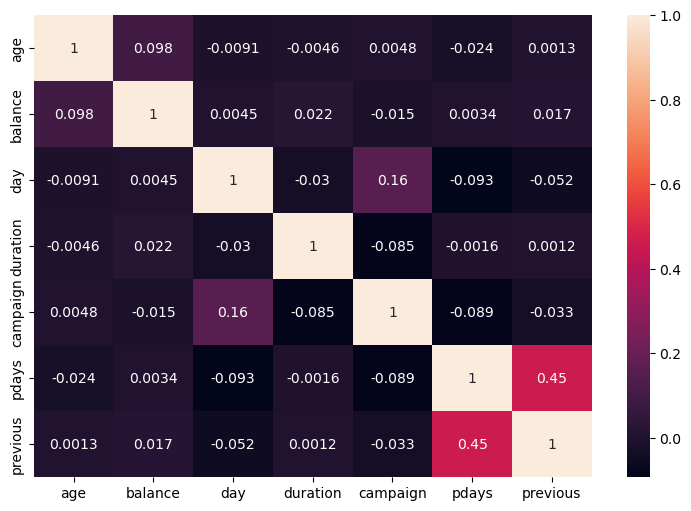

In [10]:
plt.figure(figsize=(9,6))
sns.heatmap(bank_data.corr(),annot=True)
plt.show()

## Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder=LabelEncoder()
bank_data['marital']=encoder.fit_transform(bank_data['marital'])
bank_data['education']=encoder.fit_transform(bank_data['education'])
bank_data['default']=encoder.fit_transform(bank_data['default'])
bank_data['housing']=encoder.fit_transform(bank_data['housing'])
bank_data['loan']=encoder.fit_transform(bank_data['loan'])
bank_data['contact']=encoder.fit_transform(bank_data['contact'])
bank_data['month']=encoder.fit_transform(bank_data['month'])
bank_data['poutcome']=encoder.fit_transform(bank_data['poutcome'])
bank_data['y']=encoder.fit_transform(bank_data['y'])
bank_data['job']=encoder.fit_transform(bank_data['job'])

In [13]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


## Model building

In [20]:
## Split the data into X and Y
X=bank_data.iloc[:,0:16]
Y=bank_data['y']

In [21]:
X


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [22]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [23]:
X.shape,Y.shape

((45211, 16), (45211,))

In [25]:
## Split data into trainnig and testing model

xtrain,xtest,ytrain,ytest=train_test_split(X,Y, test_size=0.2, random_state=42)

In [26]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((36168, 16), (9043, 16), (36168,), (9043,))

In [29]:
## train the model
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [30]:
pre=logreg.predict(xtrain)

In [32]:
conf=confusion_matrix(pre,ytrain)

In [33]:
conf

array([[31387,  3456],
       [  583,   742]], dtype=int64)

In [35]:
print(classification_report(ytrain,pre))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31970
           1       0.56      0.18      0.27      4198

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [40]:
print(accuracy_score(pre, ytrain))

0.888326697633267


AUC score : 57.93%


Text(0, 0.5, 'True Positive Rate')

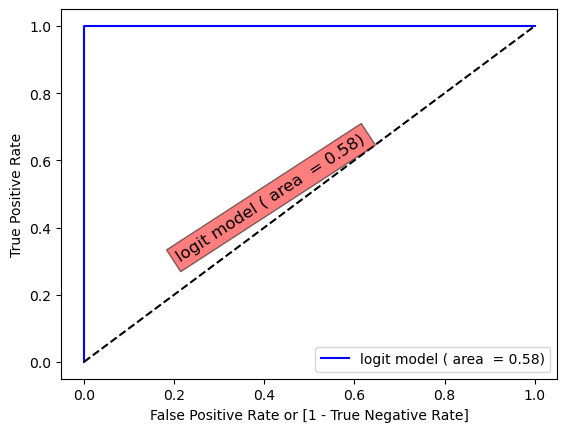

In [50]:
## Auc Roc curve
fpr, tpr, thresholds = roc_curve(pre, logreg.predict_proba(xtrain)[:,1])

auc = roc_auc_score(ytrain, pre)
print('AUC score : {:.2f}%'.format(auc*100))


x= 10
plt.plot(fpr, tpr, 
         color='blue', 
         label='logit model ( area  = %0.2f)'%auc
        )
plt.text(0.2, 0.3, 
         'logit model ( area  = %0.2f)'%auc, 
         fontsize = 12,  
         rotation = 33,
        bbox = dict(facecolor = 'red', alpha = 0.5))


plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

## Predict for testing model

In [43]:
pre1=logreg.predict(xtest)

In [44]:
conf=confusion_matrix(ytest,pre1)

In [45]:
conf

array([[7804,  148],
       [ 900,  191]], dtype=int64)

In [46]:
print(classification_report(ytest,pre1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.56      0.18      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.88      0.86      9043



In [48]:
print(accuracy_score(pre1,ytest))

0.8841092557779497


AUC score : 57.82%


Text(0, 0.5, 'True Positive Rate')

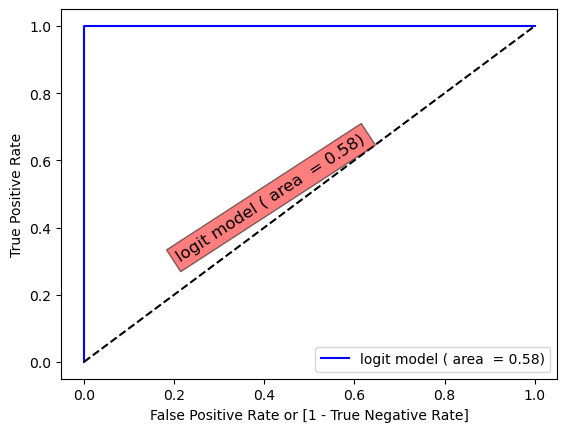

In [49]:
## Auc Roc curve
fpr, tpr, thresholds = roc_curve(pre1, logreg.predict_proba(xtest)[:,1])

auc = roc_auc_score(ytest, pre1)
print('AUC score : {:.2f}%'.format(auc*100))


x= 10
plt.plot(fpr, tpr, 
         color='blue', 
         label='logit model ( area  = %0.2f)'%auc
        )
plt.text(0.2, 0.3, 
         'logit model ( area  = %0.2f)'%auc, 
         fontsize = 12,  
         rotation = 33,
        bbox = dict(facecolor = 'red', alpha = 0.5))


plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')